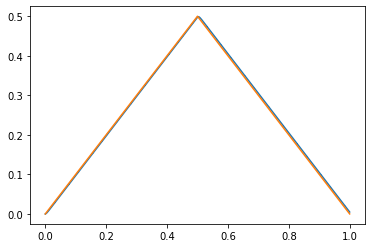

In [70]:
import numpy as np
from matplotlib import pyplot as plt

def get_marked_string(marker:str, search_string:str) -> str:
    start_marker = "<" + marker + ">"
    end_marker = "</" + marker + ">"

    start = search_string.find(start_marker) + len(start_marker)
    if start == -1:
        raise RuntimeError(f"Failed to find <{marker}>\n")
    end = search_string.find(end_marker)
    if end == -1:
        raise RuntimeError(f"Failed to find </{marker}>\n")

    return file_string[start:end]

with open("/home/alexm/log_file.txt") as file:
    file_string = file.read()

    num_samples = int(get_marked_string("num_samples", file_string))
    size = int(get_marked_string("input_size", file_string))

    data = np.zeros((size, num_samples))
    data_string = get_marked_string("data", file_string)
    data_string_lines = data_string.split("\n")

    line_counter = 0
    for line in data_string_lines:
        if line:
            for point, i in zip(line.split(), range(num_samples)):
                data[line_counter, i] = float(point)
            line_counter += 1
        

    times = np.zeros((num_samples,))

    time_string = get_marked_string("times", file_string)
    for point, i in zip(time_string.split(), range(num_samples)):
        try:
            times[i] = float(point)
        except:
            print("Failed {}".format(point))

with open("/home/alexm/dlog_file.txt") as file:
    file_string = file.read()

    num_samples = int(get_marked_string("num_samples", file_string))
    size = int(get_marked_string("input_size", file_string))

    ddata = np.zeros((size, num_samples))
    data_string = get_marked_string("data", file_string)
    data_string_lines = data_string.split("\n")

    line_counter = 0
    for line in data_string_lines:
        if line:
            for point, i in zip(line.split(), range(num_samples)):
                ddata[line_counter, i] = float(point)
            line_counter += 1
        
    dtimes = np.zeros((num_samples,))

    time_string = get_marked_string("times", file_string)
    for point, i in zip(time_string.split(), range(num_samples)):
        try:
            dtimes[i] = float(point)
        except:
            print("Failed {}".format(point))

plt.plot(times, data[2, :])
plt.plot(dtimes, ddata[2, :])
plt.show()
